In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Create the dataset
np.random.seed(42) # generates a fixed numbers that is not random

# Create a dataset
data = {
    "Product_id": range(1, 21),
    "Product_name": [f'Product{i}' for i in range(1, 21)],
    "category": np.random.choice(["Electronic", "Clothing", "Home", "Sports"], 20),
    "Units_sold": np.random.poisson(lam=20, size=20),
    "Sales_date": pd.date_range(start="2025-01-01", periods=20, freq="D")
}

sales_data = pd.DataFrame(data)
print("Sales Data")
print(sales_data)

Sales Data
    Product_id Product_name    category  Units_sold Sales_date
0            1     Product1        Home          25 2025-01-01
1            2     Product2      Sports          15 2025-01-02
2            3     Product3  Electronic          17 2025-01-03
3            4     Product4        Home          19 2025-01-04
4            5     Product5        Home          21 2025-01-05
5            6     Product6      Sports          17 2025-01-06
6            7     Product7  Electronic          19 2025-01-07
7            8     Product8  Electronic          16 2025-01-08
8            9     Product9        Home          21 2025-01-09
9           10    Product10    Clothing          21 2025-01-10
10          11    Product11        Home          17 2025-01-11
11          12    Product12        Home          22 2025-01-12
12          13    Product13        Home          14 2025-01-13
13          14    Product14        Home          17 2025-01-14
14          15    Product15      Sports     

In [6]:
# Save the dataframe to csv file

sales_data.to_csv("sales_data.csv", index=False)

In [7]:
import os
os.getcwd()

'D:\\Mikun\\All Learnings\\Data Science PyCharm\\python learnings\\statistics'

Staistic introduction
   * Population = Large group of people
   * Sample  = Randomly pick some of individual



# Descriptive Statistics
Describe the statistics of the dataset
* Mean
* Median
* Mode
* Variance
* Standard Deviation

In [10]:
# Descriptive stats oon "Units_sold" attribute
descriptive_stats = sales_data["Units_sold"].describe()
print("\nDescriptive statistics for Units Sold: ")
print(descriptive_stats)


mean_sales = sales_data["Units_sold"].mean()
median_sales = sales_data["Units_sold"].median()
mode_sales = sales_data["Units_sold"].mode()[0]
variance_sales = sales_data["Units_sold"].var()
std_deviation_sales = sales_data["Units_sold"].std()

category_stats = sales_data.groupby("category")["Units_sold"].agg(["sum", "mean", "std"]).reset_index()



# Display The result
print("\n Statistical Analysis: ")
print(f"Mean units sold: {mean_sales}")
print(f"Median units sold: {median_sales}")
print(f"Mode units sold: {mode_sales}")
print(f"Variance units sold: {variance_sales}")
print(f"Standard Deviation units sold: {std_deviation_sales}")

print("\nCategory Statistics: ")
print(category_stats)


Descriptive statistics for Units Sold: 
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: Units_sold, dtype: float64

 Statistical Analysis: 
Mean units sold: 18.8
Median units sold: 18.5
Mode units sold: 17
Variance units sold: 10.905263157894737
Standard Deviation units sold: 3.302311789927586

Category Statistics: 
     category  sum       mean       std
0    Clothing   21  21.000000       NaN
1  Electronic   73  18.250000  2.217356
2        Home  181  20.111111  3.723051
3      Sports  101  16.833333  2.714160


We know Descriptive stats always play with numbers

# Inferntial stats

* It always deals with probability and distributions

In [14]:
confidence_level = 0.95
degrees_freedom = len(sales_data["Units_sold"]) - 1

sample_mean = mean_sales

sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data["Units_sold"]))

# t-score
t_score = stats.t.ppf((1 + confidence_level)/2, degrees_freedom)
margin_of_error =t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\n Confidence Interval for mean of Units sold: ")
print(confidence_interval)


 Confidence Interval for mean of Units sold: 
(np.float64(17.254470507823573), np.float64(20.34552949217643))


It means 17 - 20 Unites at 95% confidence level

# Hypothesis testing

In [16]:
t_statistic, p_value = stats.ttest_1samp(sales_data["Units_sold"], 20)
print("\n Hypothesis testing (t-test):")
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

if p_value < 0.05:
    print("Reject the Null Hypothesis: The mean units sold is different from 20")

else:
    print("Fail to reject the Null Hypothesis: The mean units sold is not different from 20")


 Hypothesis testing (t-test):
T-statistic: -1.6250928099424466, p-value: 0.12061572226781002
Fail to reject the Null Hypothesis: The mean units sold is not different from 20


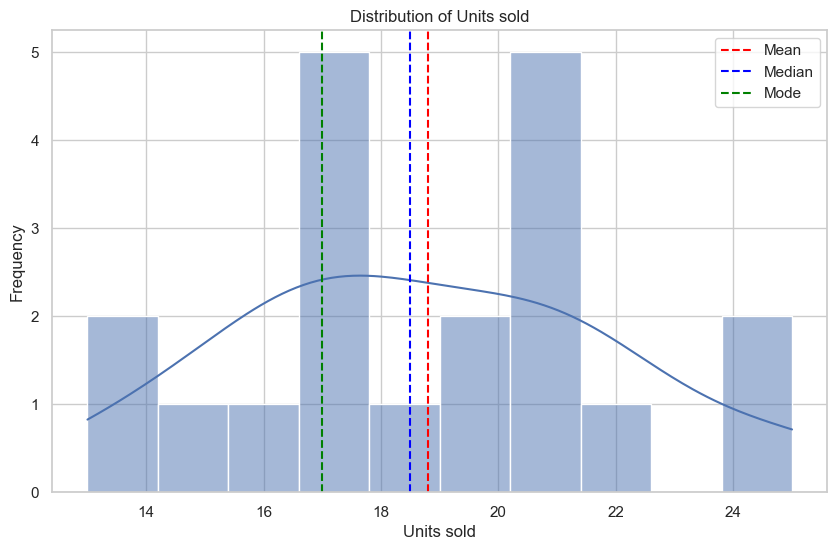

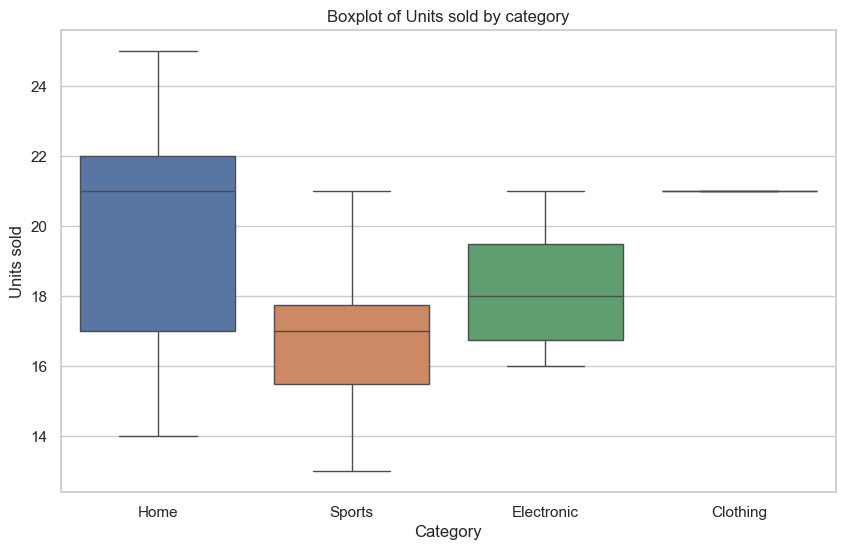

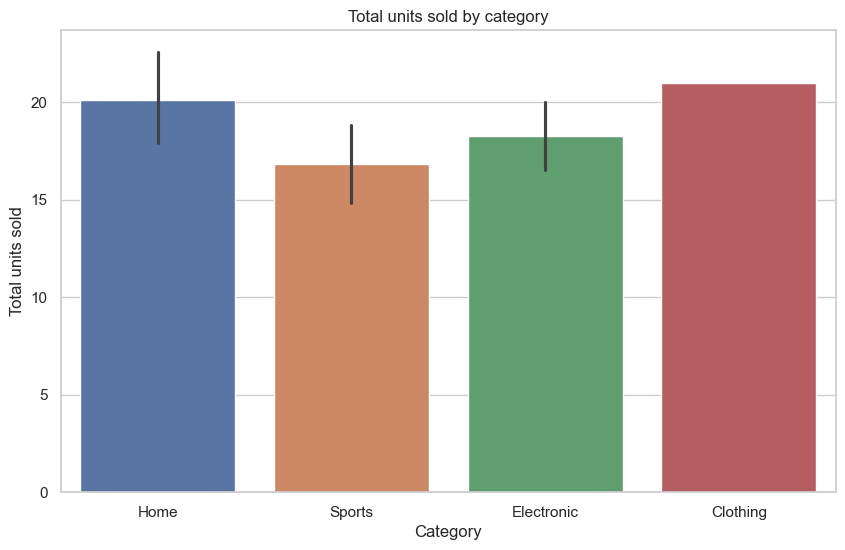

In [19]:
# visualization
sns.set(style="whitegrid")

# plot distribution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data["Units_sold"], bins=10, kde=True)
plt.title("Distribution of Units sold")
plt.xlabel("Units sold")
plt.ylabel("Frequency")
plt.axvline(mean_sales, color='red', linestyle='--', label="Mean")
plt.axvline(median_sales, color='blue', linestyle='--', label="Median")
plt.axvline(mode_sales, color='green', linestyle='--', label="Mode")
plt.legend()
plt.show()

# Boxplot for units sold
plt.figure(figsize=(10, 6))
sns.boxplot(x="category", y="Units_sold", hue="category", data=sales_data)
plt.title("Boxplot of Units sold by category")
plt.xlabel("Category")
plt.ylabel("Units sold")
plt.show()


# Bar plot for total Units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x="category", y="Units_sold", hue="category", data=sales_data)
plt.title("Total units sold by category")
plt.xlabel("Category")
plt.ylabel("Total units sold")
plt.show()